In [13]:
import pandas as pd
import numpy as np
import scipy.stats as ss
from scipy.stats import entropy,ttest_ind,chi2_contingency, f_oneway
import os

In [14]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [15]:
path = os.getcwd()
path

'/Users/bolsolui/Documents/personal/MECAI/git/rais_dados/analises'

In [16]:
df= pd.read_csv("/Users/bolsolui/Documents/personal/MECAI/git/rais_dados/dados/escolaridade_sexo_salario/escolaridadeXSexoXsalario.csv", decimal=',', thousands='.')
df["total_pessoas_por_escolaridade"]=df.iloc[:, 2:13].sum(axis=1)

In [17]:
df.head()

,capital,faixa_remuneracao_media_sm,analfabeto,ate_5a_incompleto,5a_completo_fundamental,6a_a_9a_fundamental,fundamental_completo,medio_incompleto,medio_completo,superior_incompleto,superior_completo,mestrado,doutorado,sexo,ano,total_pessoas_por_escolaridade
0,Porto Velho - RO,"00:ate_0,50",0,1,3,90,19,135,115,6,24,0,0,F,2010,393
1,Porto Velho - RO,"01:0,51_a_1,00",7,18,40,76,333,234,2185,54,126,0,0,F,2010,3073
2,Porto Velho - RO,"02:1,01_a_1,50",84,240,332,1179,1937,1753,14012,568,531,4,0,F,2010,20640
3,Porto Velho - RO,"03:1,51_a_2,00",33,160,199,406,739,574,8566,491,1935,9,2,F,2010,13114
4,Porto Velho - RO,"04:2,01_a_3,00",38,228,187,261,551,329,5959,482,2333,14,3,F,2010,10385


In [18]:

df_faixa = pd.pivot_table(df, values='total_pessoas_por_escolaridade', index=['faixa_remuneracao_media_sm',"ano"],
                       columns=['sexo'], aggfunc="sum")
df_faixa.reset_index(inplace=True)

df_faixa.head()

sexo,faixa_remuneracao_media_sm,ano,F,M
0,"00:ate_0,50",2006,28743,23476
1,"00:ate_0,50",2007,36240,27440
2,"00:ate_0,50",2008,30607,24601
3,"00:ate_0,50",2009,39752,30656
4,"00:ate_0,50",2010,44844,34211


In [19]:
df_faixa[df_faixa["faixa_remuneracao_media_sm"]=="00:ate_0,50"]

sexo,faixa_remuneracao_media_sm,ano,F,M
0,"00:ate_0,50",2006,28743,23476
1,"00:ate_0,50",2007,36240,27440
2,"00:ate_0,50",2008,30607,24601
3,"00:ate_0,50",2009,39752,30656
4,"00:ate_0,50",2010,44844,34211
5,"00:ate_0,50",2011,47980,38009
6,"00:ate_0,50",2012,63188,43494
7,"00:ate_0,50",2013,61281,42994
8,"00:ate_0,50",2014,43410,40548
9,"00:ate_0,50",2015,46469,43061


In [20]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
df_faixa_media= df_faixa.groupby('faixa_remuneracao_media_sm')['F',"M"].mean().reset_index()
df_faixa_media["distribuicao_F"]=round(df_faixa_media['F']/df_faixa_media['F'].sum(),5)
df_faixa_media["distribuicao_M"]=round(df_faixa_media['M']/df_faixa_media['M'].sum(),5)
df_faixa_media["total"] = df_faixa_media['M']+df_faixa_media['F']
df_faixa_media["proporcao_total"] = (df_faixa_media['total']/df_faixa_media['total'].sum())
df_faixa_media["contagem_es_F"] = df_faixa_media["proporcao_total"] * df_faixa_media['F'].sum()
df_faixa_media["contagem_es_M"] = df_faixa_media["proporcao_total"] * df_faixa_media['M'].sum()
df_faixa_media.head(20)
#talvez se eu tirar entropia disso seja mais interessante

/var/folders/7z/98kf6nzs505d1y91nml4ff2wzx529r/T/ipykernel_26637/2762876877.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_faixa_media= df_faixa.groupby('faixa_remuneracao_media_sm')['F',"M"].mean().reset_index()


sexo,faixa_remuneracao_media_sm,F,M,distribuicao_F,distribuicao_M,total,proporcao_total,contagem_es_F,contagem_es_M
0,"00:ate_0,50",52167.1250,43972.5625,0.0066,0.0046,96139.6875,0.0055,43090.5599,53049.1276
1,"01:0,51_a_1,00",359682.5625,299462.3750,0.0458,0.0310,659144.9375,0.0376,295433.9163,363711.0212
2,"02:1,01_a_1,50",2338356.6875,2196584.7500,0.2976,0.2271,4534941.4375,0.2587,2032596.2209,2502345.2166
3,"03:1,51_a_2,00",1245565.1250,1764568.0000,0.1585,0.1824,3010133.1250,0.1717,1349165.2094,1660967.9156
4,"04:2,01_a_3,00",1183594.1875,1785602.1250,0.1506,0.1846,2969196.3125,0.1694,1330817.0099,1638379.3026
5,"05:3,01_a_4,00",688925.5000,913214.7500,0.0877,0.0944,1602140.2500,0.0914,718091.7907,884048.4593
6,"06:4,01_a_5,00",480188.0625,583035.3125,0.0611,0.0603,1063223.3750,0.0606,476545.0323,586678.3427
7,"07:5,01_a_7,00",585622.3125,712521.1250,0.0745,0.0737,1298143.4375,0.0740,581838.0417,716305.3958
8,"08:7,01_a_10,00",407074.4375,526890.0000,0.0518,0.0545,933964.4375,0.0533,418610.1656,515354.2719
9,"09:10,01_a_15,00",281244.0000,391706.3125,0.0358,0.0405,672950.3125,0.0384,301621.5933,371328.7192


Sera q o sexo  masculino tende a ganhar relativamente mais que o sexo feminino?

In [21]:
#aqui eu coloco lado a lado a qtd real X a quantidade esperada
#é possivel ver que na primeira faixa tem menos homens do que esperado e mais mulheres do que esperado e na ultima faixa é ao contrario 
df_faixa_media[["faixa_remuneracao_media_sm","M","contagem_es_M","F","contagem_es_F"]]

sexo,faixa_remuneracao_media_sm,M,contagem_es_M,F,contagem_es_F
0,"00:ate_0,50",43972.5625,53049.1276,52167.1250,43090.5599
1,"01:0,51_a_1,00",299462.3750,363711.0212,359682.5625,295433.9163
2,"02:1,01_a_1,50",2196584.7500,2502345.2166,2338356.6875,2032596.2209
3,"03:1,51_a_2,00",1764568.0000,1660967.9156,1245565.1250,1349165.2094
4,"04:2,01_a_3,00",1785602.1250,1638379.3026,1183594.1875,1330817.0099
5,"05:3,01_a_4,00",913214.7500,884048.4593,688925.5000,718091.7907
6,"06:4,01_a_5,00",583035.3125,586678.3427,480188.0625,476545.0323
7,"07:5,01_a_7,00",712521.1250,716305.3958,585622.3125,581838.0417
8,"08:7,01_a_10,00",526890.0000,515354.2719,407074.4375,418610.1656
9,"09:10,01_a_15,00",391706.3125,371328.7192,281244.0000,301621.5933


statistic: Este é o valor da estatística qui-quadrado. Ele é usado para testar se há uma diferença significativa entre as frequências observadas e as frequências esperadas. Quanto maior o valor da estatística, maior a diferença entre as frequências observadas e esperadas. No seu caso, há dois valores na array: 87815.23769409 e 108110.03077604. Isso pode indicar que há uma grande divergência entre as frequências observadas e esperadas nos dados que você está testando. Aqui a gente consegue observar que as mulhers tem um valor maior então elas estao mas "desadequadas" a distribuição que os homens e olhando nos dados anteriores é possivel ver que nas faixas menores tem mais concentração de mulheres e nas maiores maior concentracao de homens

pvalue: Este é o valor-p, que indica a probabilidade de observar um resultado igual ou mais extremo do que o observado, assumindo que a hipótese nula seja verdadeira. No caso do teste qui-quadrado, a hipótese nula é que não há diferença significativa entre as frequências observadas e esperadas. Se o valor-p for baixo (normalmente, menor que um limite de significância, como 0.05), então rejeitamos a hipótese nula e concluímos que há uma diferença significativa entre as frequências observadas e esperadas. No seu resultado, o valor-p é [0., 0.]. Isso significa que o valor-p é extremamente baixo, indicando que há uma diferença significativa entre as frequências observadas e esperadas.








In [22]:
ss.chisquare(f_obs=df_faixa_media[["M","F"]],
             f_exp=df_faixa_media[["contagem_es_M","contagem_es_F"]])

Power_divergenceResult(statistic=array([ 87815.23769409, 108110.03077604]), pvalue=array([0., 0.]))

In [23]:
#t-student test
t_statistic, p_value = ttest_ind(df_faixa_media['distribuicao_M'], df_faixa_media['distribuicao_F'])

print("Estatística t:", t_statistic)
print("Valor-p:", p_value)

#infelizmente com o  t-student nao vemos diferenca significativa

Estatística t: -2.5881670186876845e-05
Valor-p: 0.9999795826727018


In [24]:
#testando outra forma de qui quadrado
#nao deu bom 
contingency_table = df_faixa_media[['contagem_es_M', 'contagem_es_F']].values.T


chi2_stat, p_val, _, _ = chi2_contingency(contingency_table)

print("Estatística qui-quadrado:", chi2_stat)
print("Valor-p:", p_val)

Estatística qui-quadrado: 4.206922345959977e-25
Valor-p: 1.0


A entropia é uma medida da incerteza ou desordem em um sistema. Quanto maior a entropia, maior a incerteza ou desordem.

Ao calcular a entropia das distribuições de homens e mulheres em cada faixa salarial, você está essencialmente medindo a desigualdade entre os gêneros em relação à distribuição de empregos em diferentes faixas salariais.

Com base nos resultados que você forneceu, a entropia da distribuição de empregos por faixa salarial em relação ao gênero feminino em relação ao masculino varia de 0.06 a 0.70.

Valores mais próximos de zero indicam uma distribuição mais homogênea entre os gêneros, onde as proporções de homens e mulheres são semelhantes em todas as faixas salariais.
Valores mais altos indicam uma distribuição mais desigual entre os gêneros, onde há uma diferença maior entre as proporções de homens e mulheres em diferentes faixas salariais.




In [26]:
df_faixa_media

sexo,faixa_remuneracao_media_sm,F,M,distribuicao_F,distribuicao_M,total,proporcao_total,contagem_es_F,contagem_es_M,entropia_F_em_relacao_a_M
0,"00:ate_0,50",52167.1250,43972.5625,0.0066,0.0046,96139.6875,0.0055,43090.5599,53049.1276,0.0578
1,"01:0,51_a_1,00",359682.5625,299462.3750,0.0458,0.0310,659144.9375,0.0376,295433.9163,363711.0212,0.2487
2,"02:1,01_a_1,50",2338356.6875,2196584.7500,0.2976,0.2271,4534941.4375,0.2587,2032596.2209,2502345.2166,0.6973
3,"03:1,51_a_2,00",1245565.1250,1764568.0000,0.1585,0.1824,3010133.1250,0.1717,1349165.2094,1660967.9156,0.6023
4,"04:2,01_a_3,00",1183594.1875,1785602.1250,0.1506,0.1846,2969196.3125,0.1694,1330817.0099,1638379.3026,0.5970
5,"05:3,01_a_4,00",688925.5000,913214.7500,0.0877,0.0944,1602140.2500,0.0914,718091.7907,884048.4593,0.4362
6,"06:4,01_a_5,00",480188.0625,583035.3125,0.0611,0.0603,1063223.3750,0.0606,476545.0323,586678.3427,0.3401
7,"07:5,01_a_7,00",585622.3125,712521.1250,0.0745,0.0737,1298143.4375,0.0740,581838.0417,716305.3958,0.3856
8,"08:7,01_a_10,00",407074.4375,526890.0000,0.0518,0.0545,933964.4375,0.0533,418610.1656,515354.2719,0.3119
9,"09:10,01_a_15,00",281244.0000,391706.3125,0.0358,0.0405,672950.3125,0.0384,301621.5933,371328.7192,0.2490


In [30]:
#vamos calcular a entropia:
df_faixa_media['entropia_F_em_relacao_a_M'] = (df_faixa_media['distribuicao_F'] * np.log(1/df_faixa_media['distribuicao_F'])) + (df_faixa_media['distribuicao_M'] * np.log(1/df_faixa_media['distribuicao_M']))
df_faixa_media['proporcaoF_versus_Esperado_F'] = df_faixa_media["F"]/ df_faixa_media["contagem_es_F"] -1
df_faixa_media['proporcaoM_versus_Esperado_M'] = df_faixa_media["M"]/ df_faixa_media["contagem_es_M"] -1
#df_faixa_media['entropia_pela_dif_percent_esperado'] = (df_faixa_media['proporcaoF_versus_Esperado_F'] * np.log(1/df_faixa_media['proporcaoF_versus_Esperado_F'])) + (df_faixa_media['proporcaoM_versus_Esperado_M'] * np.log(1/df_faixa_media['proporcaoM_versus_Esperado_M']))
df_faixa_media['entropia_pela_dif_percent_esperado'] = (df_faixa_media['proporcaoF_versus_Esperado_F'] * np.log(1/(df_faixa_media['proporcaoF_versus_Esperado_F'] + 1))) + (df_faixa_media['proporcaoM_versus_Esperado_M'] * np.log(1/(df_faixa_media['proporcaoM_versus_Esperado_M'] + 1)))

#df_faixa_media[["faixa_remuneracao_media_sm","entropia_F_em_relacao_a_M","proporcaoF_versus_Esperado_F","proporcaoM_versus_Esperado_M","entropia_pela_dif_percent_esperado"]]
df_faixa_media[["faixa_remuneracao_media_sm","entropia_pela_dif_percent_esperado"]]

sexo,faixa_remuneracao_media_sm,entropia_pela_dif_percent_esperado
0,"00:ate_0,50",-0.0724
1,"01:0,51_a_1,00",-0.0771
2,"02:1,01_a_1,50",-0.0370
3,"03:1,51_a_2,00",-0.0099
4,"04:2,01_a_3,00",-0.0207
5,"05:3,01_a_4,00",-0.0028
6,"06:4,01_a_5,00",-0.0001
7,"07:5,01_a_7,00",-0.0001
8,"08:7,01_a_10,00",-0.0013
9,"09:10,01_a_15,00",-0.0077


##Conclusao entropia faixa salariais:
Quanto maior maior a diferenca de genero entre as faixas podemos ver uma maior diferenca nas faixas(>=.6):
02:1,01_a_1,50	mais mulheres proporcionalmente
03:1,51_a_2,00 mais homens
04:2,01_a_3,00 mais homens


quando olhamos as distribuições dessas faixas ou quando olhamos ate mesmo as quantidades esperadas feitas par o teste de qui quadrado 

nao gostei desse teste olha o caso da faixa 5 

Explicaçao - a entropia leva em conta as quantidades totais tbm para realizar o calculo 

Se as proporções de homens e mulheres em uma determinada faixa salarial são exatamente iguais (ambas 0.09, neste caso), então a entropia deveria ser zero, já que não há incerteza na distribuição dos gêneros nessa faixa salarial. A entropia de 0.44 indica uma incerteza considerável ou desordem na distribuição dos gêneros nessa faixa salarial, o que pode ser um resultado surpreendente dado que as proporções são iguais.

Uma possível explicação para isso é a variabilidade das amostras. Mesmo que as proporções médias sejam iguais, pode haver variação nas amostras individuais, levando a diferenças na entropia calculada. Além disso, a entropia é influenciada pela quantidade total de dados e pela variação nas proporções de homens e mulheres em outras faixas salariais.



In [32]:
df_faixa_media['entropia_pela_dif_percent_esperado'] = (df_faixa_media['proporcaoF_versus_Esperado_F'] * np.log(1/(df_faixa_media['proporcaoF_versus_Esperado_F'] + 1))) + (df_faixa_media['proporcaoM_versus_Esperado_M'] * np.log(1/(df_faixa_media['proporcaoM_versus_Esperado_M'] + 1)))


sexo,faixa_remuneracao_media_sm,F,M,distribuicao_F,distribuicao_M,total,proporcao_total,contagem_es_F,contagem_es_M,entropia_F_em_relacao_a_M
0,"00:ate_0,50",52167.12,43972.56,0.01,0.00,96139.69,0.01,43090.56,53049.13,0.06
1,"01:0,51_a_1,00",359682.56,299462.38,0.05,0.03,659144.94,0.04,295433.92,363711.02,0.25
2,"02:1,01_a_1,50",2338356.69,2196584.75,0.30,0.23,4534941.44,0.26,2032596.22,2502345.22,0.70
3,"03:1,51_a_2,00",1245565.12,1764568.00,0.16,0.18,3010133.12,0.17,1349165.21,1660967.92,0.60
4,"04:2,01_a_3,00",1183594.19,1785602.12,0.15,0.18,2969196.31,0.17,1330817.01,1638379.30,0.60
5,"05:3,01_a_4,00",688925.50,913214.75,0.09,0.09,1602140.25,0.09,718091.79,884048.46,0.44
6,"06:4,01_a_5,00",480188.06,583035.31,0.06,0.06,1063223.38,0.06,476545.03,586678.34,0.34
7,"07:5,01_a_7,00",585622.31,712521.12,0.07,0.07,1298143.44,0.07,581838.04,716305.40,0.39
8,"08:7,01_a_10,00",407074.44,526890.00,0.05,0.05,933964.44,0.05,418610.17,515354.27,0.31
9,"09:10,01_a_15,00",281244.00,391706.31,0.04,0.04,672950.31,0.04,301621.59,371328.72,0.25


In [33]:
df_faixa_media[['distribuicao_F',"distribuicao_M"]]

sexo,distribuicao_F,distribuicao_M
0,0.01,0.00
1,0.05,0.03
2,0.30,0.23
3,0.16,0.18
4,0.15,0.18
5,0.09,0.09
6,0.06,0.06
7,0.07,0.07
8,0.05,0.05
9,0.04,0.04


In [34]:

#Kolmogorov-Smirnov 
from scipy.stats import ks_2samp
ks_statistic, p_value = ks_2samp(df_faixa_media['F'],df_faixa_media['M'])

print("Estatística KS:", ks_statistic)
print("Valor-p:", p_value)

Estatística KS: 0.16666666666666666
Valor-p: 0.9984852944874484


In [35]:
#teste ANOVA
#sem diferenca
F = df_faixa_media['distribuicao_F']
M = df_faixa_media['distribuicao_M']


# Realizar o teste ANOVA
f_statistic, p_value = f_oneway(M, F)

print("Estatística F:", f_statistic)
print("Valor-p:", p_value)

Estatística F: 6.698608516548327e-10
Valor-p: 0.9999795826797466


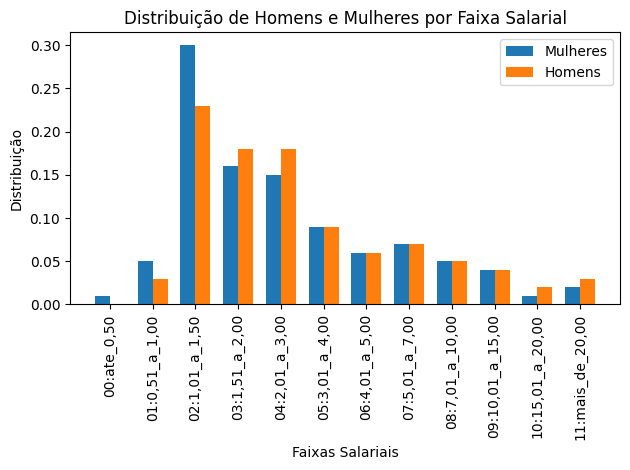

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Distribuições de mulheres e homens
distribuicao_F = [0.01, 0.05, 0.30, 0.16, 0.15, 0.09, 0.06, 0.07, 0.05, 0.04, 0.01, 0.02]
distribuicao_M = [0.00, 0.03, 0.23, 0.18, 0.18, 0.09, 0.06, 0.07, 0.05, 0.04, 0.02, 0.03]

# Faixas salariais
faixas_salariais = ["00:ate_0,50", "01:0,51_a_1,00", "02:1,01_a_1,50", "03:1,51_a_2,00",
                    "04:2,01_a_3,00", "05:3,01_a_4,00", "06:4,01_a_5,00", "07:5,01_a_7,00",
                    "08:7,01_a_10,00", "09:10,01_a_15,00", "10:15,01_a_20,00", "11:mais_de_20,00"]

# Posições das barras
posicoes = np.arange(len(faixas_salariais))

# Largura das barras
largura = 0.35

# Criar o gráfico de barras
fig, ax = plt.subplots()
barras_F = ax.bar(posicoes - largura/2, distribuicao_F, largura, label='Mulheres')
barras_M = ax.bar(posicoes + largura/2, distribuicao_M, largura, label='Homens')

# Adicionar rótulos, título e legenda
ax.set_xlabel('Faixas Salariais')
ax.set_ylabel('Distribuição')
ax.set_title('Distribuição de Homens e Mulheres por Faixa Salarial')
ax.set_xticks(posicoes)
ax.set_xticklabels(faixas_salariais, rotation=90)
ax.legend()

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [42]:
# mais pra frente vou fazer analise de significancia de variavel .... por enquanto na analise estatistica sobre faixa irei parar por aqui 

In [41]:
import statsmodels.api as sm

# Variável dependente: contagens de empregos
y_m = df_faixa_media[['M']]
y_f = df_faixa_media[['F']]

# Variável independente: gênero (considerando 0 para homens e 1 para mulheres)
X = sm.add_constant(pd.Series([0, 1]))

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y_m, y_f).fit()

# Exibir os resultados do modelo
print(modelo.summary())

                                 OLS Regression Results                                
Dep. Variable:                      M   R-squared (uncentered):                   0.956
Model:                            OLS   Adj. R-squared (uncentered):              0.952
Method:                 Least Squares   F-statistic:                              239.5
Date:                Sat, 02 Mar 2024   Prob (F-statistic):                    8.20e-09
Time:                        14:42:52   Log-Likelihood:                         -164.74
No. Observations:                  12   AIC:                                      331.5
Df Residuals:                      11   BIC:                                      332.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/opt/homebrew/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1971: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  k, _ = kurtosistest(a, axis)
